# 중간고사
## 2016202027 컴퓨터정보공학부 김상순
---

## 1. 다음은 랜덤 데이터를 읽고 이를 회귀분석하는 코드의 일부이다. 주석을 참고하여 TODO를 채워라.
#### (Hint. 이 데이터에 대한 회귀 분석을 위해 밑에 있는 2차식을 가정한다.)
$$
f(x) = w_0 + w_1x + w_2x^2
$$

In [2]:
import warnings
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings(action='ignore')

(50,)
(50,)


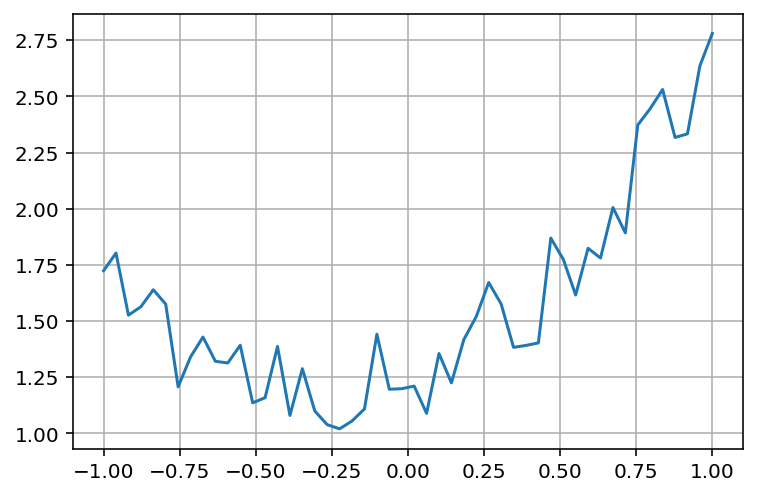

In [3]:
# 입력값
xload = np.load('./data/regressionX.npy')

#목표치
tload = np.load('./data/regressionT.npy')

print(xload.shape)
print(tload.shape)

# TODO : 위에서 로드한 데이터를 그래프로 나타냄
plt.plot(xload, tload)
plt.grid()
plt.show()

     fun: 0.6205176891469938
     jac: array([0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([0.7, 1. , 0.5])


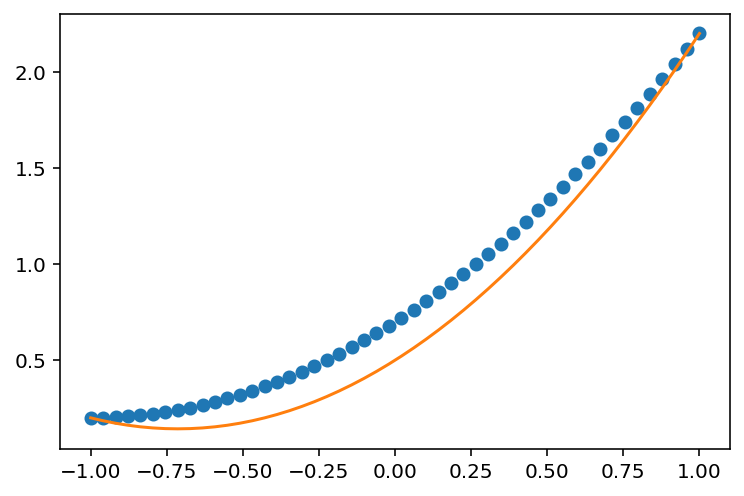

In [4]:
# MSE 함수 구현
def loss_mse(w, x, t):
    y = w0[0] + w0[1]*x + w0[2]*x*x # TODO: w와 x를 이용한 함수값 계산. 2차식 함수
    val = 0.0    
    for n in range(len(x)):                
        val = (1/2) * np.sum((y-t)**2) #TODO: MSE 계산식
    val = val / x.shape[0]
    return val

# 초기값
w0 = np.array([0.7, 1, 0.5])

#Scipy를 이용한 최적화
_w = minimize(loss_mse, w0, args=(xload, tload), method="CG") #TODO
print(_w)

# 예측값을 구하기 위한 배열화
ft = np.array([[1., xval, xval**2] for xval in xload])
    
# 예측값
pred = np.dot(ft, _w.x)
    
# TODO : # 목표값과 최적화를 통해 구한 함수를 그래프로 나타냄


def show_line(x, t, w0, w1, w2):
    plt.plot(x, t, 'o')
    y = w0 * x * x + w1 * x + w2
    plt.plot(x, y)
    
show_line(xload, pred, w0[0], w0[1], w0[2])

### 2. 다음은 데이터에 대한 binary classification 코드이다. 이 코드는 크게 두 부분으로 구성된다. 
### 첫번째는 데이터를 읽고 두 클래스를 분류하는 결정경계를 파이썬으로 직접 구하는 부분이고 
### 두번째는 사이킷런을 이용하여 임의로 학습 데이터와 테스트 데이터로 나누어 성능을 측정한다.
### 주석을 참고하여 TODO를 채워라.
#### (Hint. 이 데이터에 대한 분류를 위해 밑에 있는 1차식을 가정한다.)
$$
f(x) = w_0x_0 + w_1x_1 + w_2
$$

(200, 2)
(200,)
(200, 2)


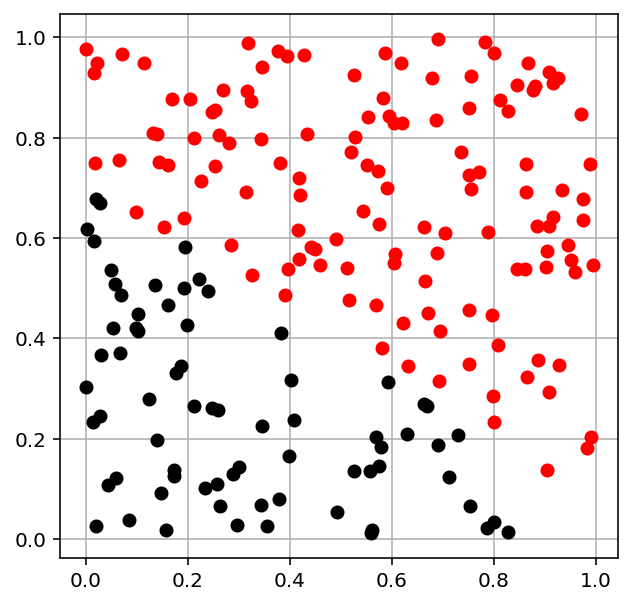

In [19]:
# 입력값
X = np.load("./data/classificationX.npy")

# 출력값1 - 출력값이 숫자로 저장 되어 있음 (0 혹은 1)
T1 = np.load("./data/classificationT1.npy")

# 출력값2 - 출력값이 원핫코딩으로 저장되어 있음 (10 혹은 01)
T2 = np.load("./data/classificationT2.npy")

print(X.shape)
print(T1.shape)
print(T2.shape)

# 데이터 갯수
N = X.shape[0]

# 입력 차원수
dim = 2

# 클래스 갯수
K = 2

def show_data(x, t):
    c = [[0, 0, 0], [1, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1], linestyle='none', marker='o', color=c[k])
        plt.grid(True)
        
# 데이터 표시
plt.figure(figsize=(5, 5))
show_data(X, T2)

w0 = -35.16, w1 = -56.25, w2 = 39.81


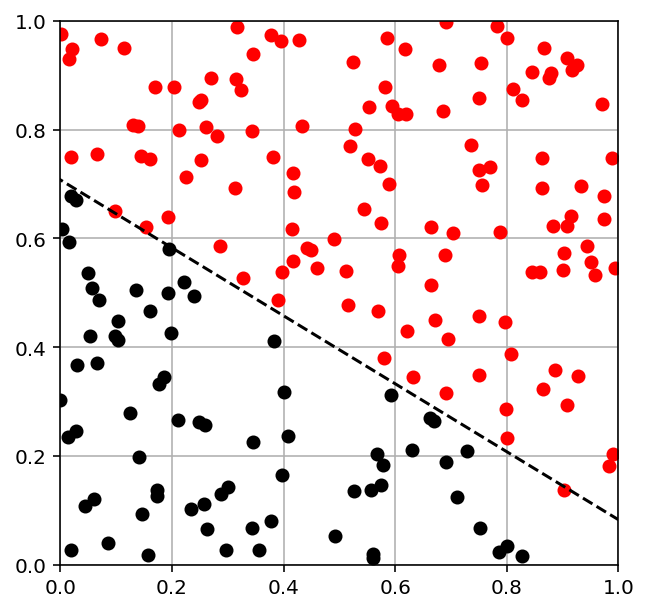

In [20]:
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2]))) # TODO: 시그모이드 함수
    return y

def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)    
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) + (1 - t[n, 0]) * np.log(1 - y[n])) # TODO: 크로스 엔트로피 
    cee = cee / X_n
    return cee

# 직선 그리는 함수
def show_line(W):
    xn = 50 # 파라미터의 분할 수
    X_range0 = [-1, 1] # X0 범위 표시 용    
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = -(W[0]/W[1])*x0 - W[2]/W[1]
    plt.plot(x0, x1, '--k')    
    
# w 초기값
w_init = [1, 1, -1]

#Scipy를 이용한 최적화
res =  minimize( cee_logistic2, w_init, args=(X, T2), method="CG" )
_w = res.x
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(_w[0], _w[1], _w[2]))

plt.figure(1, figsize=(5, 5))
show_data(X, T2)
show_line(_w)
plt.xlim(-.0, 1.0)
plt.ylim(-.0, 1.0)
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, T1, random_state=42)
print(x_train.shape)
print(y_train.shape)

logreg = LogisticRegression().fit(x_train, y_train)# 사이킷 런 로지스틱 회귀 함수를 이용한 학습

print("학습 세트 점수: {:.3f}".format(logreg.score(x_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(x_test, y_test)))

(150, 2)
(150,)
학습 세트 점수: 0.967
테스트 세트 점수: 0.960
